## Harshita Girniwale

## Data Science & Business Analytics Intern @ The Sparks Foundation

## TASK 1

## Problem statement : Predict the percentage of an student based on the no. of study hours.

## Importing dataset

In [2]:
import pandas as pd
import numpy as np
path = "C:/Users/LENOVO/Desktop/Book1.csv"
data = pd.read_csv(path)
data

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Discover and visualize data to gain insigths

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


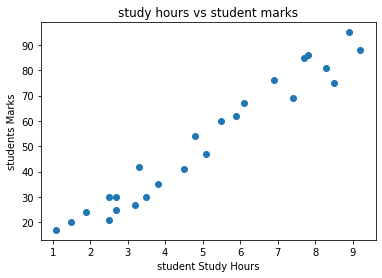

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=data.Hours , y=data.Score)
plt.xlabel("student Study Hours")
plt.ylabel("students Marks")
plt.title("study hours vs student marks")
plt.show()

## Prepare The data for Machine Learning Algorithm

In [7]:
# Data Cleaning
data.isnull().sum()

Hours    0
Score    0
dtype: int64

In [8]:
## Split dataset for traning
x=data.drop("Score", axis="columns")
y=data.drop("Hours", axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=21) 
#test_size defining how musch data we want for testing so 0.2 means i am using 20% data 

In [10]:
print("shape of x tarin",X_train.shape)
print("shape of y tarin",Y_train.shape)
print("shape of x test",X_test.shape)
print("shape of y tarin",Y_test.shape)

shape of x tarin (20, 1)
shape of y tarin (20, 1)
shape of x test (5, 1)
shape of y tarin (5, 1)


## select a model and train it

In [11]:
# so as in scatter plot we saw that if value of x is increasing then value of y also increasing linearly so we can use liner 
#regration
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [12]:
LR.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
LR.coef_

array([[9.90957862]])

In [14]:
LR.intercept_

array([1.11928695])

In [15]:
LR.predict([[4]])[0][0].round(2)

40.76

In [16]:
y_pred = LR.predict(X_test)
y_pred

array([[51.65813792],
       [61.56771655],
       [33.8208964 ],
       [15.98365488],
       [55.62196937]])

In [17]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["Hours","Score","Predicted_score"])

,Hours,Score,Predicted_score
0,5.1,47.0,51.658138
1,6.1,67.0,61.567717
2,3.3,42.0,33.820896
3,1.5,20.0,15.983655
4,5.5,60.0,55.621969


## Fine tuning the mode

In [18]:
LR.score(X_test,Y_test)

0.8840309431657934

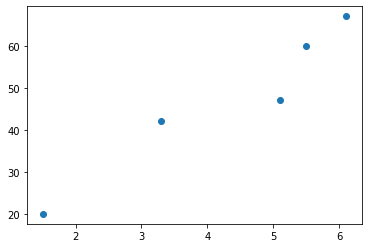

In [19]:
plt.scatter(X_test,Y_test)

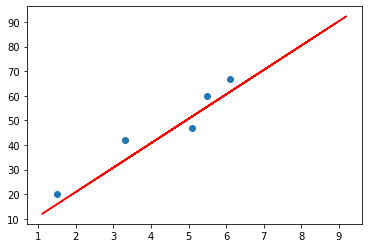

In [20]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,LR.predict(X_train),color="red")

## Solution for What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours = 9.25
own = LR.predict([[hours]])
print("no of hours={}".format(hours))
print("predicted score={}".format(own[0]))

no of hours=9.25
predicted score=[92.78288921]


## Evaluating the model

In [22]:
from sklearn import metrics 
print("mean absolute error",metrics.mean_absolute_error(Y_test,y_pred))

mean absolute error 5.332780144143608
